In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the dataset
ds=pd.read_csv(r"mushrooms.csv")
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Checking null values
ds.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ds.columns:
    ds[col]=le.fit_transform(ds[col])
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
x=ds.iloc[:,1:23].values
y=ds.iloc[:,0].values
x.shape

(8124, 22)

In [6]:
# Splitting the data to train & test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(6499, 22)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [9]:
# Traing with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# Prediction
y_pred=rfc.predict(x_test)

In [12]:
# Getting accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [14]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[855,   0],
       [  0, 770]], dtype=int64)

In [15]:
# roc
import sklearn.metrics as metrics
fpr,tpr, threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

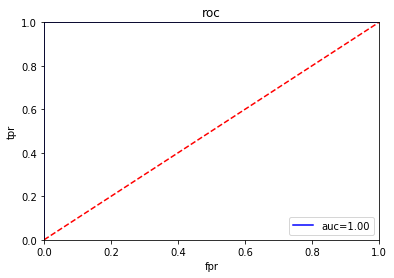

In [16]:
# Plotting roc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("tpr")
plt.xlabel("fpr")

# Done